# **Linear Regression Model and Penalties**

## <b> **Problem Statement:** </b>

Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

#### <b> **Analysis to be done:** </b>

The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

#### <b>**Dataset**</b>

Google Play Store data (**googleplaystore.csv**)

#### <b> **Data Dictionary:**</b>

|Variables|Description|
|:-|:-|
|App| Application name|
|Category|Category to which the app belongs|
|Rating|Overall user rating of the app|
|Reviews|Number of user reviews for the app|
|Size|Size of the app|
|Installs|Number of user downloads/installs for the app|
|Type|Paid or Free|
|Price|Price of the app|
|Content Rating|Age group the app is targeted at - Children / Mature 21+ / Adult|
|Genres|An app can belong to multiple genres (apart from its main category)<br>For example, a musical family game will belong to Music, Game, Family genres|
|Last Updated|Date when the app was last updated on Play Store|
|Current Ver|Current version of the app available on Play Store|
|Android Ver|Minimum required Android version|

#### <b> **Import Libraries**</b>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

#### <b> **Import and Check Dataset**</b>

In [2]:
inp0 = pd.read_csv("./googleplaystore.csv")

In [3]:
# Check first five rows
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


#### <b> Observations </b>
The data will be displayed on the screen.

In [4]:
#Check number of columns and rows, and data types
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### <b> **Check Data Types**</b>

In [5]:
#checking datatypes
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### <b> **Finding and Treating Null Values**</b>

In [6]:
#Finding count of null values
inp0.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#Dropping the records with null ratings
#This is done because ratings is our target variable
inp0.dropna(how ='any', inplace = True)

In [8]:
inp0.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### <b> Handling the Variables </b>

**1. Clean the price column**

In [9]:
#Cleaning the price column
inp0.Price.value_counts()[:5]

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: count, dtype: int64

#### <b> Observations </b>
Some have dollars, some have 0
* We need to conditionally handle this.
* First, let's modify the column to take 0 if value is 0, else take the first letter onwards.

In [10]:
#Modifying the column
inp0['Price'] = inp0.Price.map(lambda x: 0 if x=='0' else float(x[1:]))  #deleting the $ symbol

In [11]:
inp0['Price'][235]

np.float64(4.99)

**The other columns with numeric data are:<br>**
1. Reviews
2. Installs
3. Size

**2. Convert reviews to numeric**

In [12]:
#Converting reviews to numeric
inp0.Reviews = inp0.Reviews.astype("int32")

In [13]:
#checking datatypes
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

**3. Handle the installs column**

In [15]:
#Handling the installs column
inp0.Installs.value_counts()

Installs
1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

We'll need to remove the commas and the plus signs.

<b> Defining function for the same </b>

In [16]:
def clean_installs(val):
    return (val.replace(",","").replace("+",""))

In [17]:
inp0.Installs = inp0.Installs.map(clean_installs)

In [18]:
inp0.Installs.describe()

count        9360
unique         19
top       1000000
freq         1576
Name: Installs, dtype: object

In [19]:
inp0.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: object

**4. Handle the app size field**

In [20]:
#Handling the app size field
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [21]:
inp0["Size"] = inp0["Size"].map(change_size)

In [22]:
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [23]:
inp0.Size.isnull().sum()

np.int64(1637)

In [24]:
#Filling Size which had NA
inp0.Size.fillna(method = 'ffill', inplace = True)

In [25]:
#Checking datatypes
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### **Sanity checks**

1. Average rating should be between 1 and 5, as only these values are allowed on Play Store. Drop any rows that have a value outside this range.

In [26]:
#Checking the rating
inp0.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### <b> Observations </b>

Min is 1 and max is 5. None of the values have rating outside the range.

In [27]:
#Converting reviews to numeric
inp0.Installs = inp0.Installs.astype("int32")

2. Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.

In [28]:
#Checking and counting the rows
len(inp0[inp0.Reviews > inp0.Installs])

7

In [29]:
inp0[inp0.Reviews > inp0.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [30]:
inp0 = inp0[inp0.Reviews <= inp0.Installs].copy()

In [31]:
inp0.shape

(9353, 13)

3. For free apps **(Type == “Free”)**, the price should not be **> 0**. Drop any such rows.

In [32]:
len(inp0[(inp0.Type == "Free") & (inp0.Price>0)])

0

#### **EDA**

#### <b> Box Plot: Price</b>

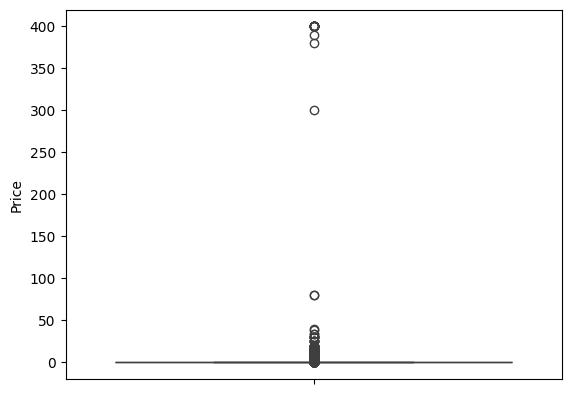

In [33]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0.Price)
plt.show()

#### <b> Box Plot: Reviews</b>

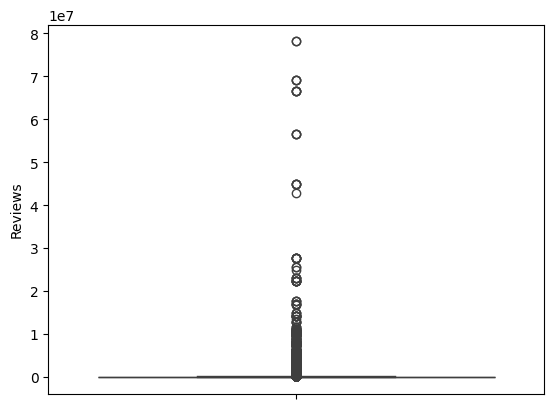

In [34]:
#Are there any apps with very high number of reviews? Do the values seem right?
sns.boxplot(inp0.Reviews)
plt.show()

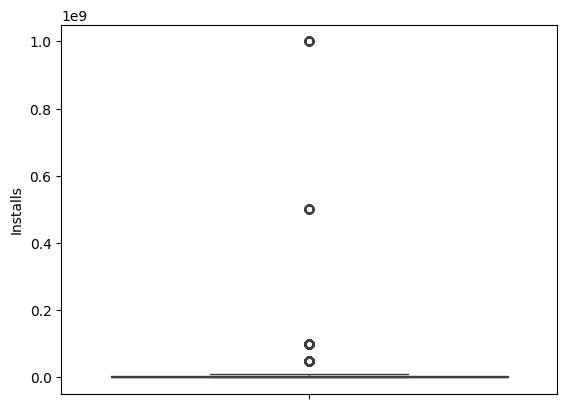

In [35]:
#Are there any apps with very high number of reviews? Do the values seem right?
sns.boxplot(inp0.Installs)
plt.show()

#### **Checking Distribution and Skewness:**

How are the ratings distributed? Is it more toward higher ratings?

##### **Distribution of Ratings**

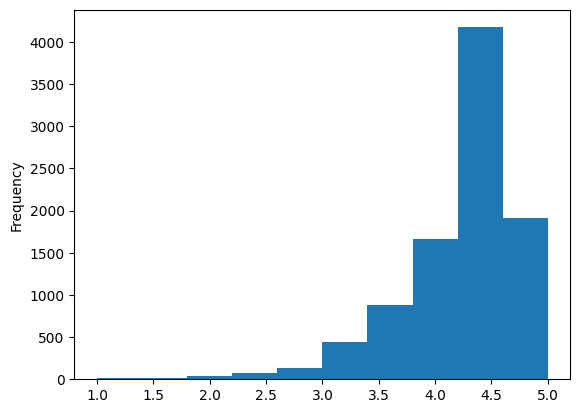

In [36]:
#Distributing the ratings
inp0.Rating.plot.hist()
#Show plot
plt.show()

##### **Histogram: Size**

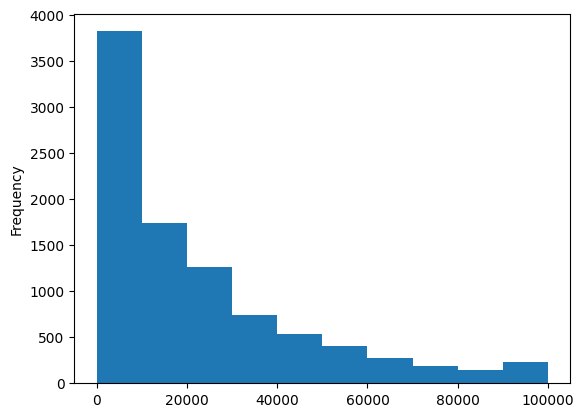

In [37]:
inp0['Size'].plot.hist()
#Show plot
plt.show()

#### <b> Observations </b>
A histogram is plotted with ratings on the x-axis and frequency on the y-axis, and the ratings are distributed.

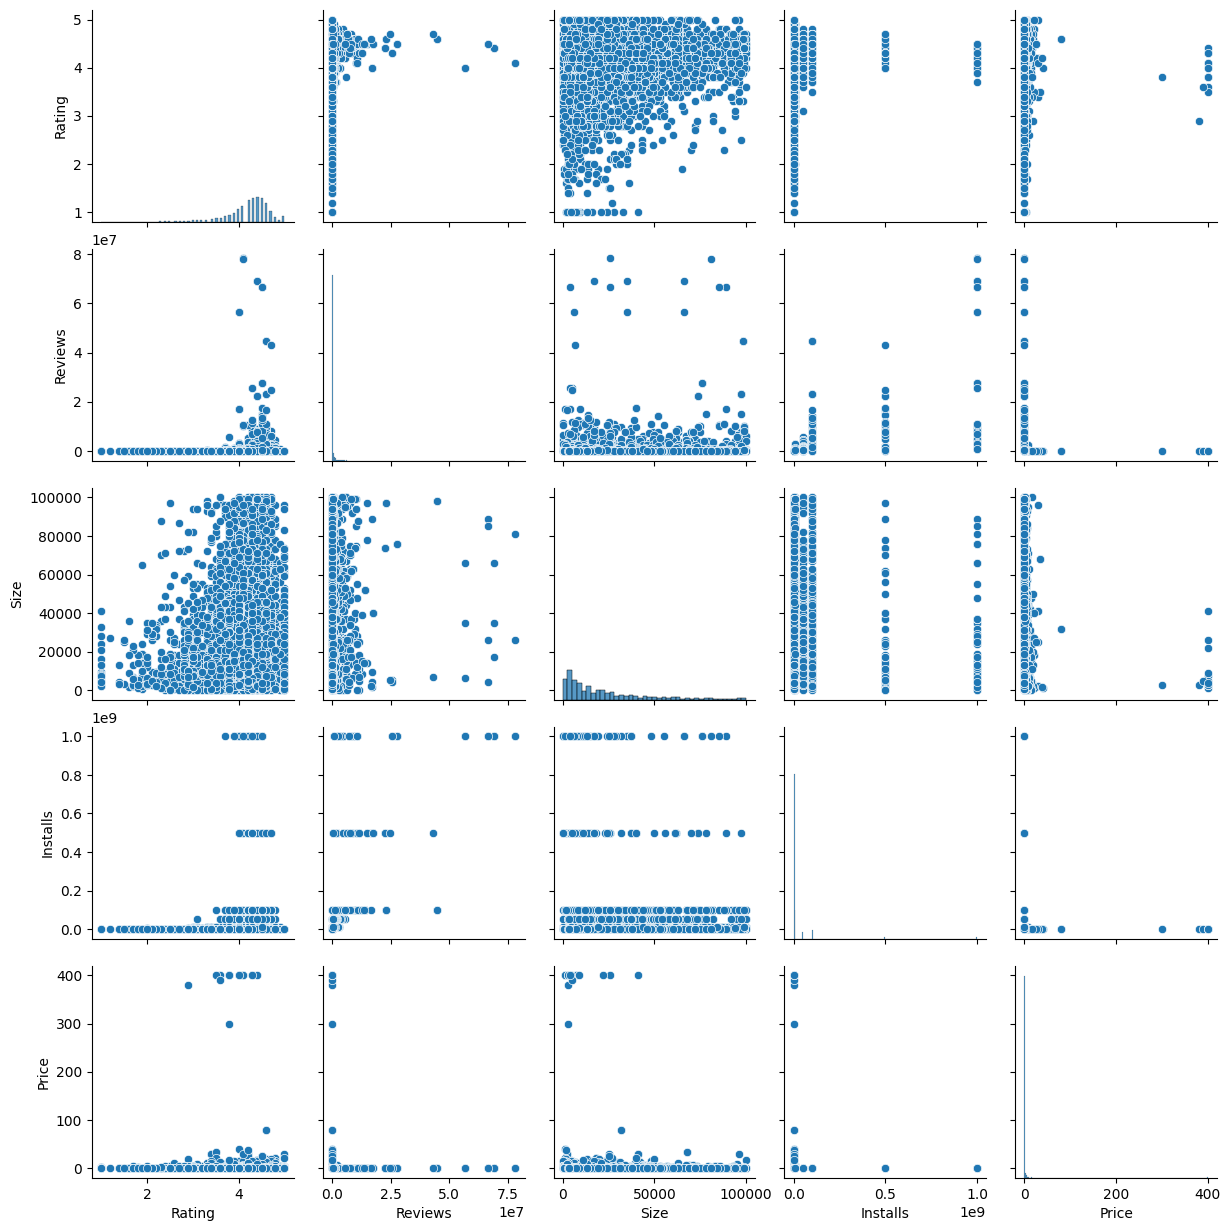

In [38]:
#Pair plot
sns.pairplot(data=inp0)

##### **Outlier Treatment:**


##### **1. Price:** 

From the box plot, it seems like there are some apps with very high prices. A price of $200 for an application on the Play Store is very high and suspicious.
Check the records that have very high price:
Is 200 a high price?

In [39]:
#Checking the records
len(inp0[inp0.Price > 200])

15

In [40]:
inp0[inp0.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
inp0 = inp0[inp0.Price <= 200].copy()
inp0.shape

(9338, 13)

##### **2. Reviews:**

Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [42]:
#Dropping the records with more than 2 million reviews
inp0 = inp0[inp0.Reviews <= 2000000]
inp0.shape

(8885, 13)

##### **3. Installs:**

There seem to be some outliers in this field too. Apps having a very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99.

Decide a threshold as the cutoff for outliers and drop records having values more than the threshold.




In [43]:
#Dropping the apps that have a very high number of installs
inp0.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

#### <b> Observations </b>

Looks like there are just 1% of apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [44]:
#Dropping the apps with more than 100M installs
len(inp0[inp0.Installs >= 1000000000])

6

In [45]:
inp0 = inp0[inp0.Installs < 1000000000].copy()
inp0.shape

(8879, 13)

#### **Bi-variate Analysis:**

Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relationhips between rating and the other features.

##### **1.	Make scatter plot/join plot for Rating vs. Price**

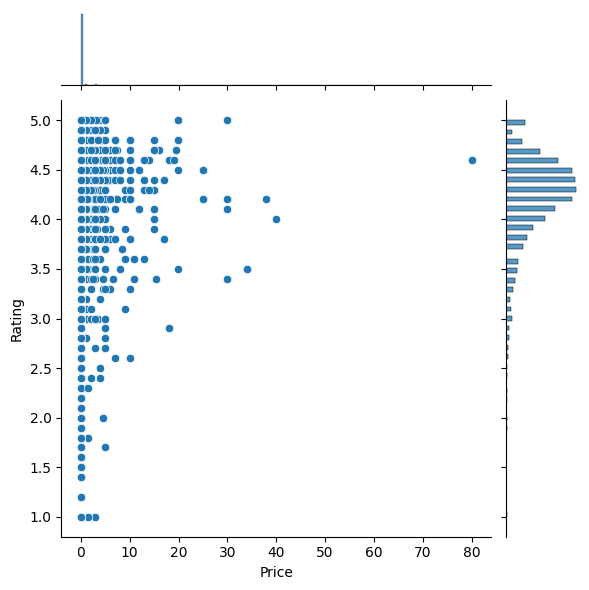

In [46]:
# What pattern do you observe? Does rating increase with price?

sns.jointplot(x='Price', y='Rating', data=inp0)


##### **2.	Make scatter plot/joinplot for Rating vs Size**

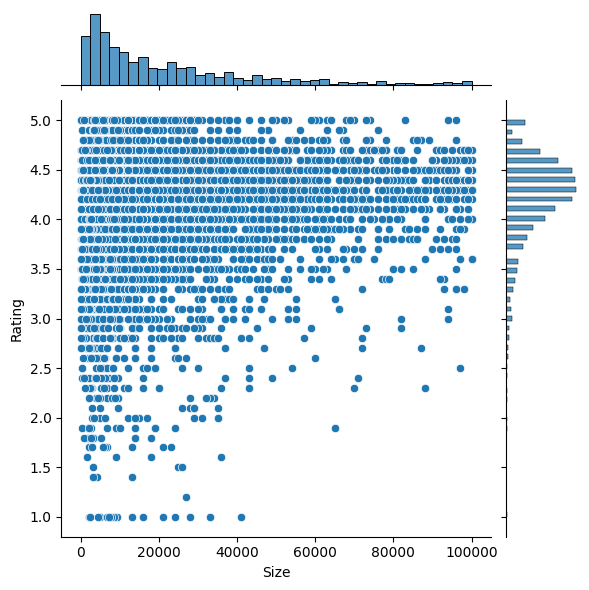

In [47]:
# Are heavier apps rated better?

sns.jointplot(x='Size', y='Rating', data=inp0)


##### **3.	Make scatter plot/joinplot for Rating vs Reviews**

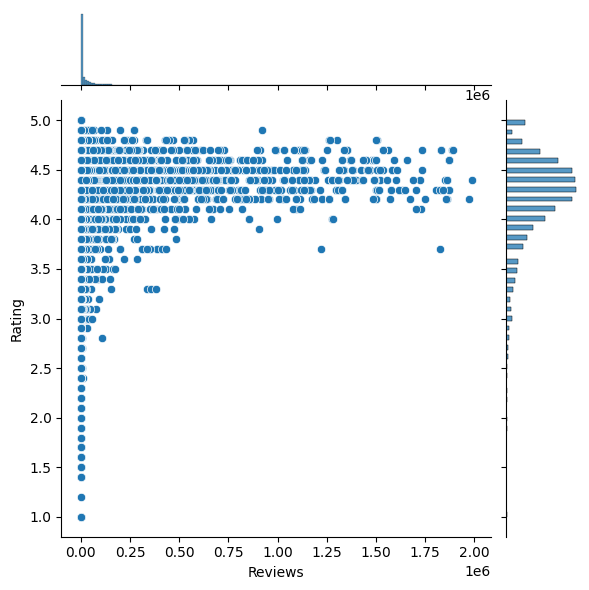

In [48]:
# Does more review mean a better rating always?

sns.jointplot(x='Reviews', y='Rating', data=inp0)

##### **4.	Make boxplot for Rating vs Content Rating**

<Axes: xlabel='Content_Rating', ylabel='Rating'>

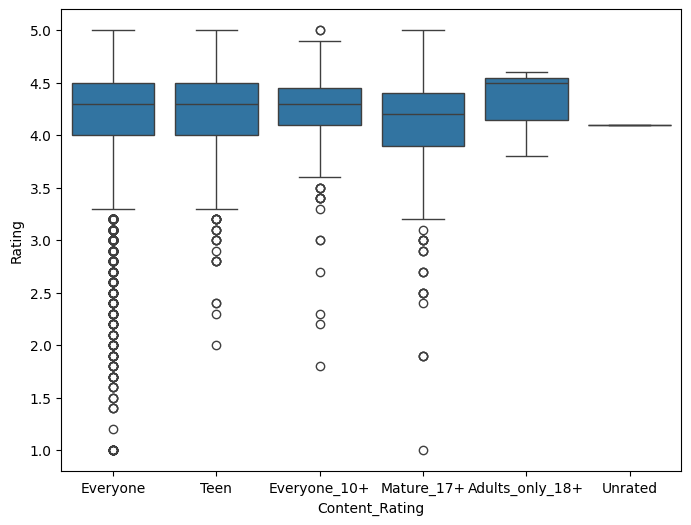

In [49]:
#Is there any difference in the ratings? Are some types liked better?
plt.figure(figsize=[8,6])

sns.boxplot(x='Content_Rating', y='Rating', data=inp0)

##### **5. Make boxplot for Ratings vs. Category**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

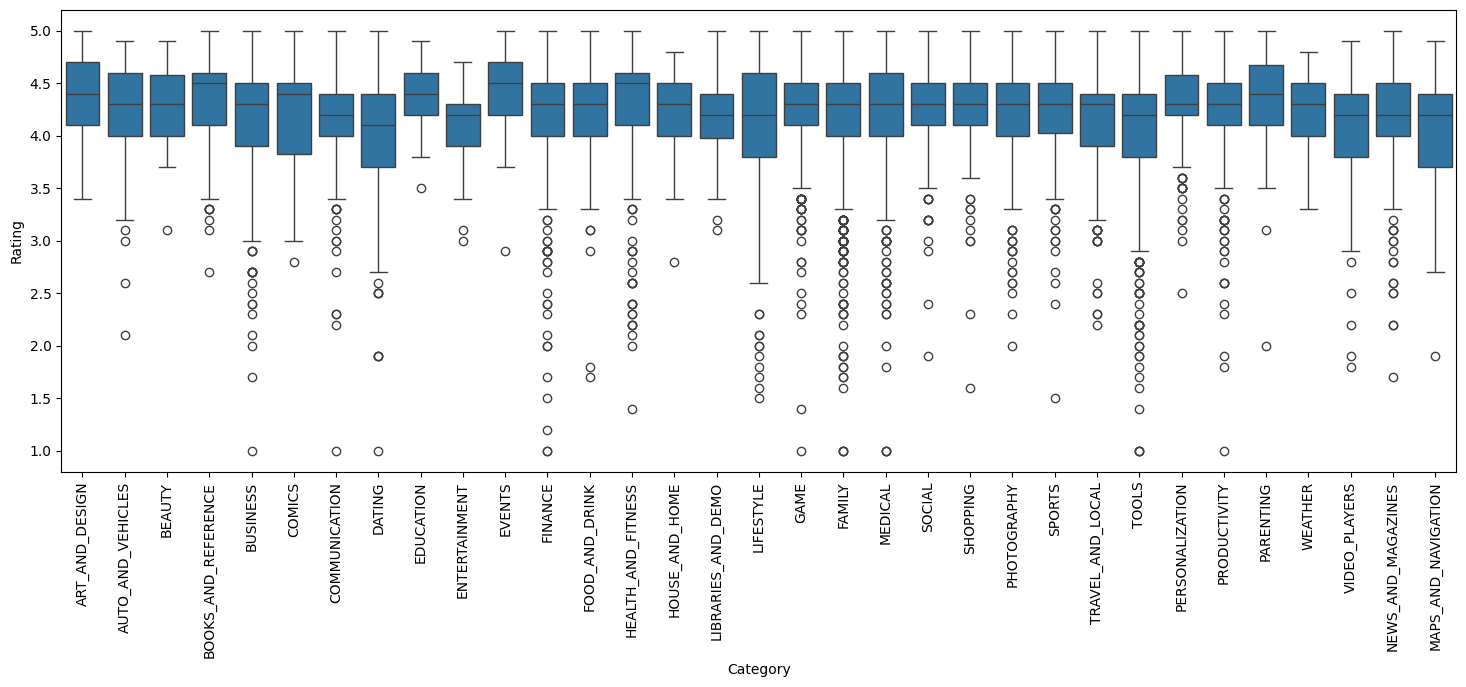

In [50]:
# Which genre has the best ratings?
plt.figure(figsize=[18,6])
g = sns.boxplot(x='Category', y='Rating', data=inp0)
plt.xticks(rotation=90)

#### **Pre-processing the Dataset**

##### **1. Make a copy of the dataset**

In [51]:
#Making a copy
inp1 = inp0.copy()

In [52]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


##### **2. Apply log transformation (np.log1p) to Reviews and Installs**

Reviews and Installs have some values that are still relatively very high.
Before building a linear regression model, you need to reduce the skew.

In [53]:
#Reducing the skew
inp0.Installs.describe()

count    8.879000e+03
mean     5.595862e+06
std      2.421042e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [54]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [55]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)#log(x+1) =0

In [56]:
inp1.Reviews

0         5.075174
1         6.875232
2        11.379520
3        12.281389
4         6.875232
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8879, dtype: float64

orinial one  
scalling  
modeling  
predicting - scaled     
inverse scaling - o/p  

##### **3. Drop columns App, Last Updated, Current Ver, and Android Ver**

 These variables are not useful for our task.

In [57]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [58]:
#Dropping the variables that are not useful for our task
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp1.shape

(8879, 9)

In [59]:
inp1.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

In [60]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres'],
      dtype='object')

##### **4. Dummy Columns:**


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric fields. Name of the dataframe should be **inp2**.

In [61]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [62]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art_&_Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art_&_Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art_&_Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art_&_Design_Creativity
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,6.216606,Free,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,4.744932,3600.0,6.908755,Free,0.0,Mature_17+,Books_&_Reference


In [63]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [64]:
inp2.shape

(8879, 157)

In [65]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,6.875232,14000.0,13.122365,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,11.379520,8700.0,15.424949,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,12.281389,25000.0,17.727534,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,6.875232,2800.0,11.512935,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10836,4.5,3.663562,53000.0,8.517393,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,5.0,1.609438,3600.0,4.615121,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10839,4.5,4.744932,3600.0,6.908755,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#### **Train-test split**

Let us distribute the data into **training** and **test** datasets using the **train_test_split()** function.

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
#?train_test_split

In [68]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [69]:
df_train.shape, df_test.shape

((6215, 157), (2664, 157))

In [70]:
df_train.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1279,4.7,7.636270,6900.0,11.512935,0.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6900,4.2,5.799093,4800.0,11.512935,0.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7357,4.7,7.407318,16000.0,9.210440,14.99,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4840,4.6,4.605170,19000.0,9.210440,0.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2102,4.4,4.882802,48000.0,11.512935,0.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Let us separate the dataframes into **X_train, y_train, X_test, y_test.**

In [71]:
y_train = df_train.pop("Rating")
X_train = df_train

In [72]:
X_train.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1279,7.63627,6900.0,11.512935,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
y_train

1279    4.7
6900    4.2
7357    4.7
4840    4.6
2102    4.4
       ... 
387     4.1
81      4.4
9724    4.6
8363    3.6
6616    4.1
Name: Rating, Length: 6215, dtype: float64

In [74]:
y_test = df_test.pop("Rating")
X_test = df_test

In [75]:
X_test.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1161,9.329456,24000.0,13.815512,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### <b> **Regression Algorithms:**</b>

Note: Let us take a look at the theory part before moving on to the training and prediction.

#### <b>Types of Regression Algorithms:</b>

* Linear regression
* Multiple linear regression
* Polynomial regression
* Ridge regression
* Lasso regression
* ElasticNet regression

#### **When to use regression?**

If target variable is a continuous numeric variable (100–2000), then use a regression algorithm.<br><br>

![Use of Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Use%20of%20Reg.JPG)

<br><br>
Note: Let us take a look at the basics of linear regression and then move on to the model builiding part where we are going to use all the concepts that we saw in previous sessions.

#### **1. Linear Regression:**

Linear Regression is a statistical model used to predict the relationship between independent and dependent variables denoted by x and y respectively.


![Lin Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Lin%20Reg.JPG)

#### **2. Muliple Linear Regression:**

Multiple linear regression is a statistical technique used to predict the outcome of a response variable through several explanatory variables and model the relationships between them.

![Multiple LR](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Multiple%20LR.JPG)

#### **3. Polynomial Regression:**

Polynomial regression is applied when data is not formed in a straight line. 
It is used to fit a linear model to non-linear data by creating new features from powers of non-linear features.

Example: Quadratic features 


![Pol Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Pol%20Reg.JPG)

In [76]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [78]:
print(np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train))))

0.47866244002356906


In [79]:
print(np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))

0.48822383448127243


#### **4. Ridge Regression:**

* Ridge Regression (L2) is used when there is a problem of multicollinearity.

* By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

<br>

![Ridge Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Ridge%20Reg.JPG)

#### **5. Lasso Regression:**

* Lasso Regression (L1) is similar to ridge, but it also performs feature selection.


* It will set the coefficient value for features that do not help in decision making very low, potentially zero.

  ![Lasso Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Lasso%20Reg.JPG)

* Lasso regression tends to exclude variables that are not required from the equation, whereas ridge tends to do better when all variables are present


#### **6. ElasticNet Regression:**

![ElasticNet Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/ElasticNet%20Reg.JPG)

#### **Use Case: Ridge, Lasso, ElasticNet Regression for Training and Prediction:**

We are going to use the same dataset that we used in the previous use case at the time of training of "model2" i.e. inp3

**1. Ridge Regression:**

In [80]:
#Importing Ridge
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.0001)
ridgeReg.fit(X_train,y_train)

,alpha,0.0001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


**Evaluating using RMSE:**

In [81]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, ridgeReg.predict(X_train))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, ridgeReg.predict(X_test))))

0.47866244005219466
0.4882234892583306


**2. Lasso Regression:**

In [82]:
#Importing Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train,y_train)

,alpha,0.001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


**Evaluating using RMSE:**

In [83]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, lassoreg.predict(X_train))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, lassoreg.predict(X_test))))

0.48400955664077305
0.4890346151035214


**3. ElasticNet Regression:**

In [84]:
#Importing ElasticNet
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001)
Elastic.fit(X_train,y_train)

,alpha,0.001
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


**Evaluating using RMSE:**

In [85]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, Elastic.predict(X_train))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, Elastic.predict(X_test))))

0.48187471296464385
0.4877346089394588
